In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data=pd.read_csv("real time example of air quality index in del.csv")
data

,Date,AQI
0,31-1-21,324.0
1,28-2-21,288.0
2,31-3-21,223.0
3,30-4-21,202.0
4,31-5-21,146.0
5,30-6-21,147.0
6,31-7-21,110.0
7,31-8-21,107.0
8,30-9-21,78.0
9,31-10-21,173.0


In [3]:
data.isnull().sum()

Date    0
AQI     0
dtype: int64

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10316\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
data.index = data['Date']

In [6]:
data = data.drop(columns=['Date'])

In [7]:
data

,AQI
Date,
2021-01-31,324.0
2021-02-28,288.0
2021-03-31,223.0
2021-04-30,202.0
2021-05-31,146.0
2021-06-30,147.0
2021-07-31,110.0
2021-08-31,107.0
2021-09-30,78.0


In [8]:
result = seasonal_decompose(data['AQI'])

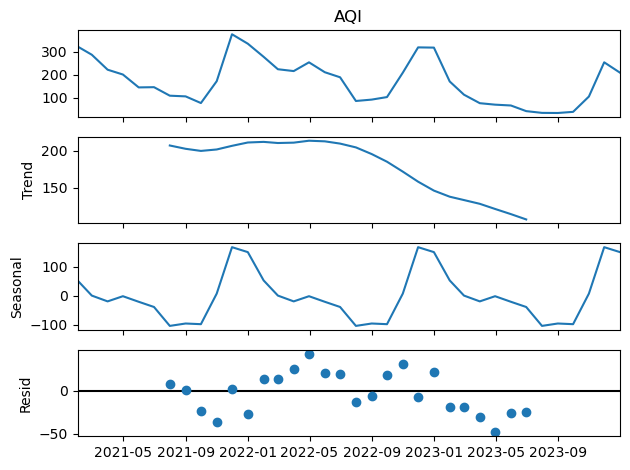

In [9]:
result.plot()
plt.show()

In [10]:
data['dt'] = data.index

In [11]:
type(data['dt'])

pandas.core.series.Series

In [12]:
data['dt'] = pd.to_datetime(data['dt'])

In [13]:
train = data[data['dt'].dt.year<2023]
test = data[data['dt'].dt.year>2022]

In [14]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10316\4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10316\4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [15]:
data_smooth = pd.DataFrame(range(1,37), columns=['X'])

In [16]:
data['X'] = data_smooth['X'].values

In [17]:
data

,AQI,dt,X
Date,,,
2021-01-31,324.0,2021-01-31,1
2021-02-28,288.0,2021-02-28,2
2021-03-31,223.0,2021-03-31,3
2021-04-30,202.0,2021-04-30,4
2021-05-31,146.0,2021-05-31,5
2021-06-30,147.0,2021-06-30,6
2021-07-31,110.0,2021-07-31,7
2021-08-31,107.0,2021-08-31,8
2021-09-30,78.0,2021-09-30,9


In [18]:
data['AQI'].rolling(2).mean().values

array([   nan, 306.  , 255.5 , 212.5 , 174.  , 146.5 , 128.5 , 108.5 ,
        92.5 , 125.5 , 275.  , 356.5 , 307.5 , 252.  , 221.  , 236.  ,
       233.5 , 201.  , 138.5 ,  90.  ,  98.5 , 157.  , 265.  , 319.5 ,
       245.4 , 143.05,  95.85,  74.2 ,  69.2 ,  55.15,  39.1 ,  35.05,
        37.25,  73.  , 180.7 , 232.55])

# SIMPLE MOVING AVERAGE

In [19]:
result = []
colum_index = 3
for i in [1,2,3,4,5]:
    column_name = 'SMA_K_'+str(i)
    data[column_name] = data['AQI'].rolling(i).mean().values
    print("MAPE for SMA with K = ",i)
    print(mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index]))
    mape_ = mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index])
    colum_index = colum_index +1
    result.append(['SMA', i, mape_])

MAPE for SMA with K =  1
0.0
MAPE for SMA with K =  2
0.1477552250010042
MAPE for SMA with K =  3
0.2777212041860226
MAPE for SMA with K =  4
0.39625026404753705
MAPE for SMA with K =  5
0.5001890645485437


In [20]:
result

[['SMA', 1, 0.0],
 ['SMA', 2, 0.1477552250010042],
 ['SMA', 3, 0.2777212041860226],
 ['SMA', 4, 0.39625026404753705],
 ['SMA', 5, 0.5001890645485437]]

In [21]:
data

,AQI,dt,X,SMA_K_1,SMA_K_2,SMA_K_3,SMA_K_4,SMA_K_5
Date,,,,,,,,
2021-01-31,324.0,2021-01-31,1,324.0,NaN,NaN,NaN,NaN
2021-02-28,288.0,2021-02-28,2,288.0,306.00,NaN,NaN,NaN
2021-03-31,223.0,2021-03-31,3,223.0,255.50,278.333333,NaN,NaN
2021-04-30,202.0,2021-04-30,4,202.0,212.50,237.666667,259.250,NaN
2021-05-31,146.0,2021-05-31,5,146.0,174.00,190.333333,214.750,236.60
2021-06-30,147.0,2021-06-30,6,147.0,146.50,165.000000,179.500,201.20
2021-07-31,110.0,2021-07-31,7,110.0,128.50,134.333333,151.250,165.60
2021-08-31,107.0,2021-08-31,8,107.0,108.50,121.333333,127.500,142.40
2021-09-30,78.0,2021-09-30,9,78.0,92.50,98.333333,110.500,117.60


In [22]:
weights = [0.2,0.8]
data['AQI'].rolling(2).apply(lambda x : (weights*x).sum() / sum(weights))

Date
2021-01-31       NaN
2021-02-28    295.20
2021-03-31    236.00
2021-04-30    206.20
2021-05-31    157.20
2021-06-30    146.80
2021-07-31    117.40
2021-08-31    107.60
2021-09-30     83.80
2021-10-31    154.00
2021-11-30    336.20
2021-12-31    344.20
2022-01-31    290.40
2022-02-28    235.80
2022-03-31    218.60
2022-04-30    247.40
2022-05-31    220.60
2022-06-30    194.40
2022-07-31    107.60
2022-08-31     91.80
2022-09-30    101.80
2022-10-31    188.80
2022-11-30    298.00
2022-12-31    319.20
2023-01-31    201.24
2023-02-28    125.80
2023-03-31     84.78
2023-04-30     72.28
2023-05-31     68.12
2023-06-30     47.80
2023-07-31     36.82
2023-08-31     34.90
2023-09-30     38.72
2023-10-31     92.98
2023-11-30    225.34
2023-12-31    219.02
Name: AQI, dtype: float64

#  WEIGHTED MOVING AVERAGE

In [23]:
colum_index = 8
for i in [2,3,4,5]:
    column_name = 'WMA_K_'+str(i)
    
    weights = list(range(1,i+1))
    data[column_name] = data['AQI'].rolling(len(weights)).apply(lambda x : (weights*x).sum() / sum(weights))
    
    
    print("MAPE for WMA with K = ",i)
    print(mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index]))
    mape_ = mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index])
    colum_index = colum_index +1
    result.append(['WMA', i, mape_])

MAPE for WMA with K =  2
0.09850348333400279
MAPE for WMA with K =  3
0.18491642086154553
MAPE for WMA with K =  4
0.2674003341532373
MAPE for WMA with K =  5
0.34188033755682234


In [24]:
result

[['SMA', 1, 0.0],
 ['SMA', 2, 0.1477552250010042],
 ['SMA', 3, 0.2777212041860226],
 ['SMA', 4, 0.39625026404753705],
 ['SMA', 5, 0.5001890645485437],
 ['WMA', 2, 0.09850348333400279],
 ['WMA', 3, 0.18491642086154553],
 ['WMA', 4, 0.2674003341532373],
 ['WMA', 5, 0.34188033755682234]]

# EXPONENTIAL MOVING AVERAGE

In [25]:
data['EMA_K_1'] = data['AQI'].ewm(span = 2).mean()

In [26]:
print("MAPE for EMA with K = 1 ")
print(mean_absolute_percentage_error(data['AQI'], data['EMA_K_1']))

MAPE for EMA with K = 1 
0.1226776031771297


In [27]:
result.append(['EMA', '1', mean_absolute_percentage_error(data['AQI'], data['EMA_K_1'])])

In [28]:
result_df = pd.DataFrame(result,columns= ['Smoothing Method', 'K', 'MAPE'])

In [29]:
result_df.sort_values(by='MAPE')

,Smoothing Method,K,MAPE
0,SMA,1,0.000000
5,WMA,2,0.098503
9,EMA,1,0.122678
1,SMA,2,0.147755
6,WMA,3,0.184916
7,WMA,4,0.267400
2,SMA,3,0.277721
8,WMA,5,0.341880
3,SMA,4,0.396250
4,SMA,5,0.500189
